### Banking Domain
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Attribute Information:
- age (numeric)
- job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'). Note: 'divorced' means divorced or widowed
- education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- day: last contact day of the month (numeric 1 -31)
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- target: has the client subscribed a term deposit? (binary: "yes","no")

#### Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [2]:
df = pd.read_csv('term-deposit.csv')
data = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis

### Univariate Analysis

#### Name of the Variables and Shape of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Observation
1. The Dataset consists of 16 independent variables and 1 dependent variable i.e Target with 45211 rows
2. 7 numerical columns namely age, balance, day, duration, campaign, pdays, previous
3. 10 Categorical subdivided as
   1. Dichotomous Nominal Variables (i.e. with only two categories) are default, housing, loan & Target
   2. Nominal Variables are job, marital, education, contact, month & poutcome

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


##### Observations
1. The value of 'duration' variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call. Hence we can drop this column from the dataset as we also have the outcome column.
2. There are negative values in the balance & pdays column. Negative values in the pdays column indicates missing values hence will treat for missing values. Negative value in the balance column seems realistic as it is an average yearly balance.
3. It has 4 Boolean variables: default, housing, loan, Target

#### Handling Dichotomous Nominal Variables

In [6]:
df.default.replace(('yes', 'no'), (1, 0), inplace=True)
df.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df.Target.replace(('yes', 'no'), (1, 0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### Observations
- Around 1% of the customer has credit in default.
- Around 55% of the customer has housing loan.
- Around 16% of customers has personal loan.
- Around 11% of the customer has subcribed a term deposit.

### Bivariate Analysis

#### Categorical Variables

In [8]:
#Method to print bar plot for the variable
def showBarPlot(df, col):
    plt.figure(figsize=(7,3))
    ax = sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col)
    plt.tight_layout()

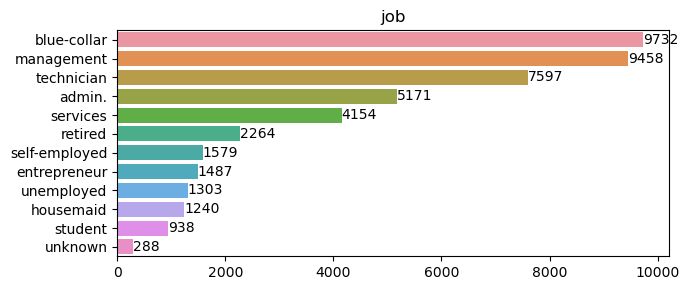

In [9]:
showBarPlot(df, 'job')

##### Observation: The job column has unknown values.

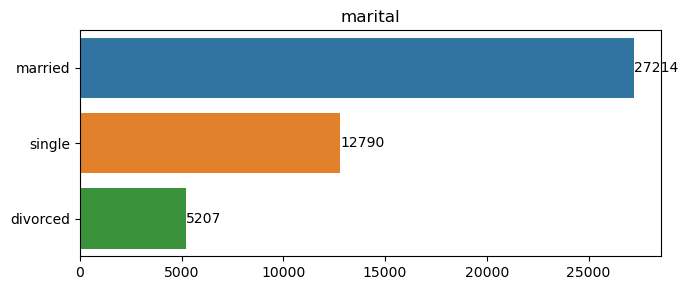

In [10]:
showBarPlot(df, 'marital')

##### Observation: The marital column has no unknown value.

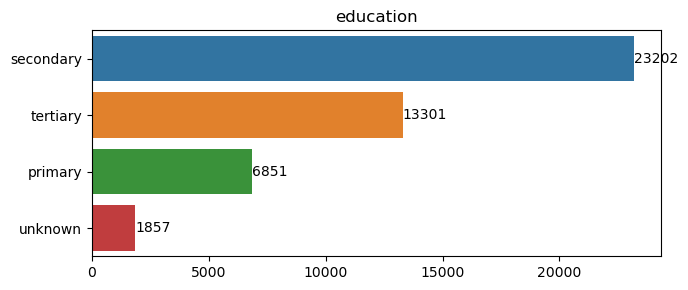

In [11]:
showBarPlot(df, 'education')

##### Observation: The education column has unknown values

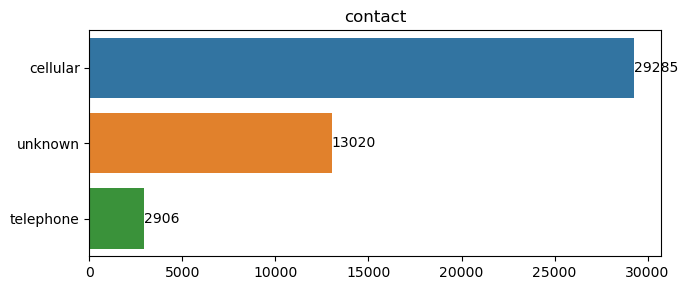

In [12]:
showBarPlot(df, 'contact')

##### Observation: The contact column has unknown values. The data is missing and we can't infer the unknown value hence will need to remove it.

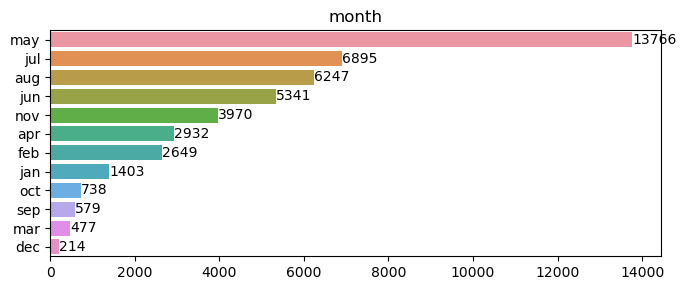

In [13]:
showBarPlot(df, 'month')

##### Observation: The month column has no unknown value

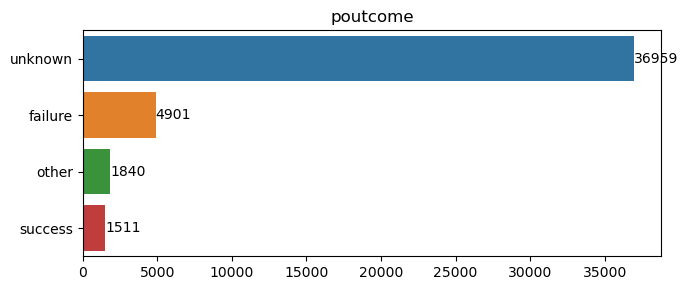

In [14]:
showBarPlot(df, 'poutcome')

##### Observation: The poutcome column has high number of unknown values

#### Handling the Unknown Values / Imputation
To infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Also, if age > 60 then the job will be retired.

The missing values can only be replaced if it makes some real world sense as shown below

In [15]:
df.job[df.age>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [16]:
# Replace unknown job with retired when age > 60
df.loc[(df.age > 60) & (df.job == 'unknown'), 'job'] = 'retired'

In [17]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,796,989,371,130
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


##### Observations
1. Infering education from jobs
From the cross-tabulation, it can be seen that people with management jobs usually have a tertiary education. Hence wherever job = management and education = unknown, we can replace education with tertiary. Based on this understanding we can carry out the following replacement to handle unknown values
   1. If job = management and education = unknown then replace education = tertiary. 
   2. If job = services and education = unknown then replace education = secondary.
2. Infering jobs from education
Here we can infer the following
   1. If education = primary and job = unknown then replace job = blue-collar

In [18]:
# Replace unknown based on above inference
df.loc[(df.job == 'management') & (df.education == 'unknown'), 'education'] = 'tertiary'
df.loc[(df.job == 'services') & (df.education == 'unknown'), 'education'] = 'secondary'
df.loc[(df.education == 'primary') & (df.job == 'unknown'), 'job'] = 'blue-collar'

In [19]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3808,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,8043,0
retired,796,989,371,130
self-employed,130,577,833,39
services,345,3607,202,0
student,44,508,223,163


##### Observation: We are able to reduce the number of unknowns and enhance our data set.

Now, the poutcome column indicates the outcome of the previous campaign. Logically, it could be either success or failure or nonexistent. Hence, we can replace other as well as unknown value with nonexistent to handle the unknown values

In [20]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
df.poutcome = df.poutcome.replace('unknown', 'nonexistent')
df.poutcome = df.poutcome.replace('other', 'nonexistent')
df.poutcome.value_counts()

nonexistent    38799
failure         4901
success         1511
Name: poutcome, dtype: int64

#### Numerical Values

In [22]:
#Method to print dist plot for the variable & print skewness   
def showPlots(df, col):
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(12,4)
    sns.distplot(df[col], ax=ax1)
    ax1.set_title(f"{col} with skewness of {df[col].skew():.3f}")
    sns.boxplot(df[col], ax=ax2)
    ax2.set_title("Box Plot")

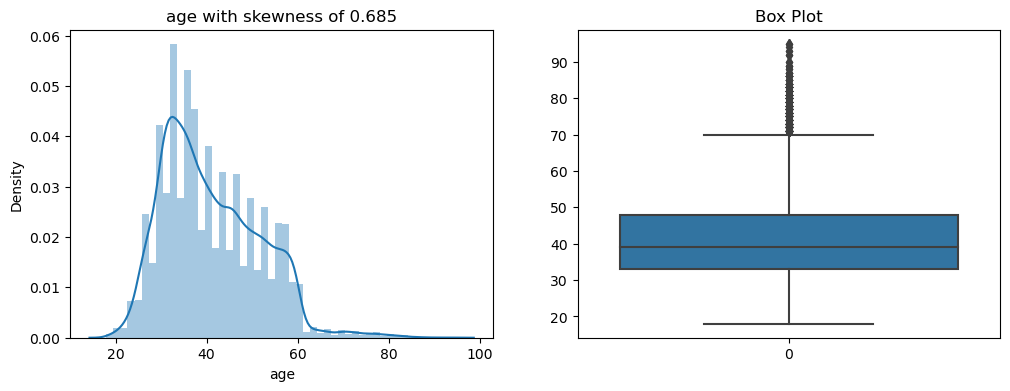

In [23]:
showPlots(df,'age')

##### Observations: age column is moderately right skewed. The graph shows presence of outliers too.

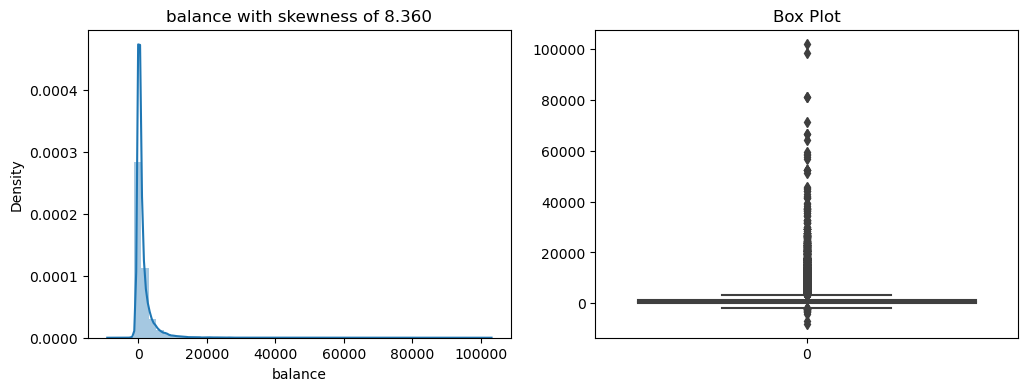

In [24]:
showPlots(df,'balance')

##### Observations: balance column is highly right skewed. The graph shows presence of outliers too.

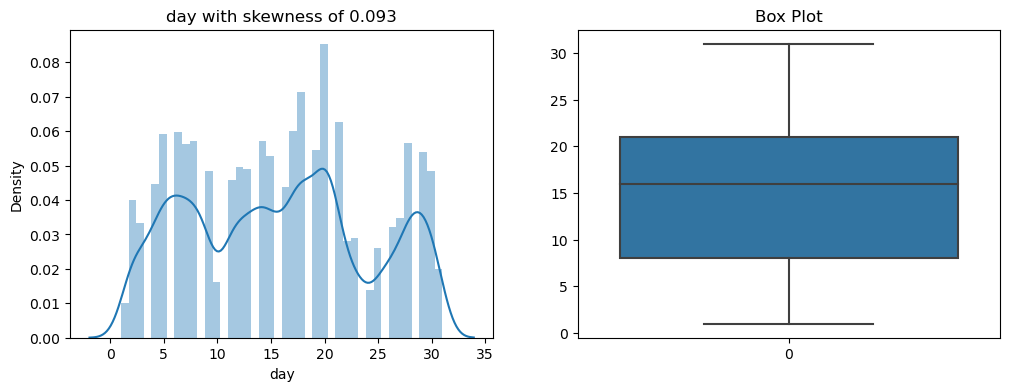

In [25]:
showPlots(df,'day')

##### Observations: day column is approximately symmetric with multiple guassians

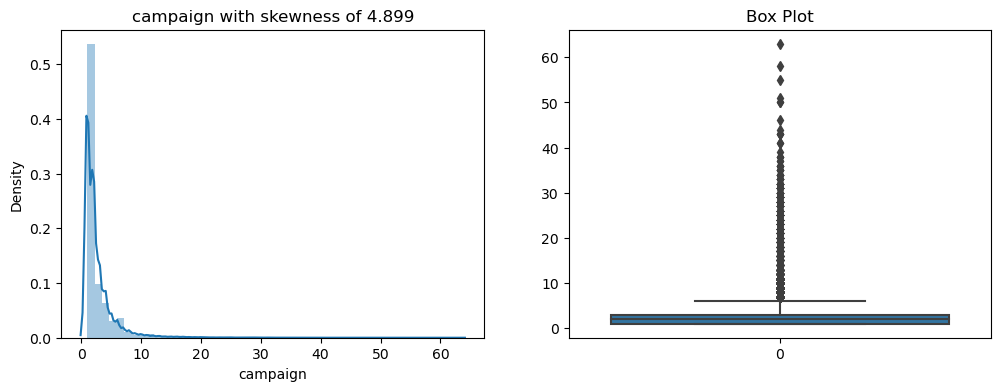

In [26]:
showPlots(df,'campaign')

##### Observations: campaign column is highly right skewed. The graph shows presence of outliers too.

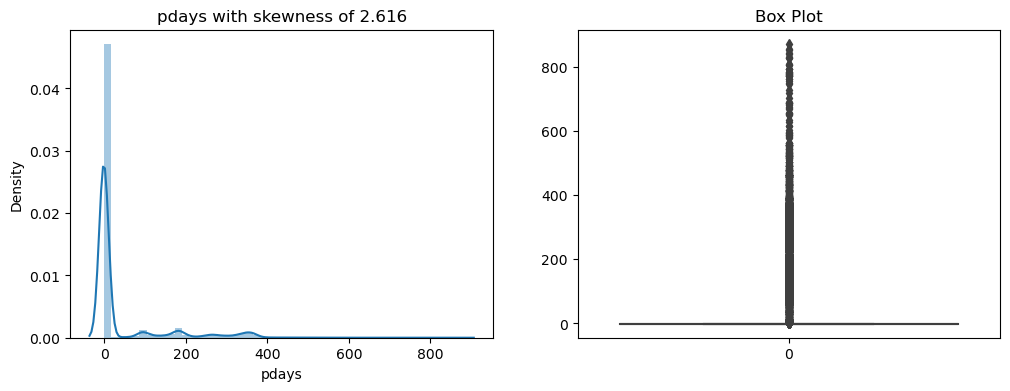

In [27]:
showPlots(df,'pdays')

##### Observations: pdays column is highly right skewed. The graph shows presence of outliers too.

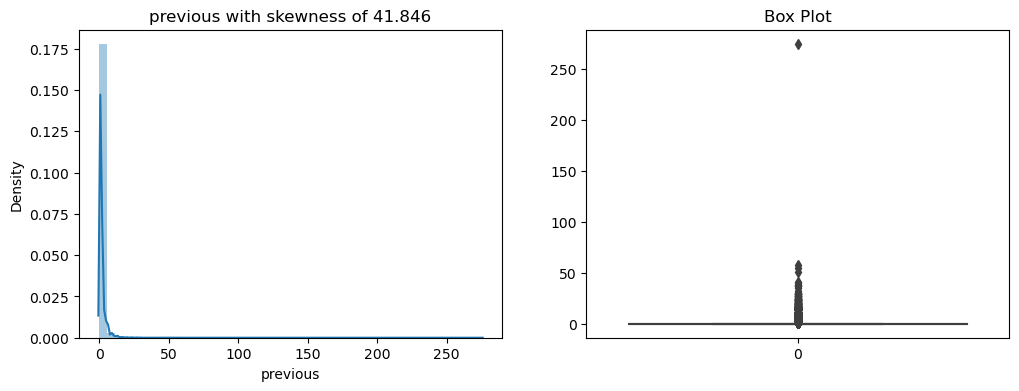

In [28]:
showPlots(df,'previous')

##### Observations: previous column is moderately right skewed. The graph shows presence of outliers too.

#### Let see the summary of the data to further understand the numerical variables.

In [29]:
numerical_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df[numerical_variables].describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


##### Observations:
##### Missing Values:
The missing value for pdays column is encoded with -1. From the above table, it is clear that 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing i.e more than 75% of values

##### Outliers:
Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that all columns except day have outliers. In other words the columns age, balance, campaign, pdays & previous have outliers.

But we also see that the value of these outliers age, campaign & balance are not so unrealistic. Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. Therefore, we will treat outliers of pdays & previous columns only.

#### Outliers Treatment

pdays & previous columns of dataset will be treated

In [30]:
from scipy import stats
#pdays
df['pdays_zscore'] = np.abs(stats.zscore(df.pdays))
df = df[df['pdays_zscore'] < 3]
df.drop('pdays_zscore', axis=1, inplace=True)

#previous
df['previous_zscore'] = np.abs(stats.zscore(df.previous))
df = df[df['previous_zscore'] < 3]
df.drop('previous_zscore', axis=1, inplace=True)

In [31]:
df.shape

(42992, 17)

#### MIssing Value Treatment
Let's examine the missing values i.e. -1 in pdays column. Filtered out missing values encoded with an out-of-range value when plotting the histogram of values in order to properly understand the distribution of the known values.

KeyError: 0

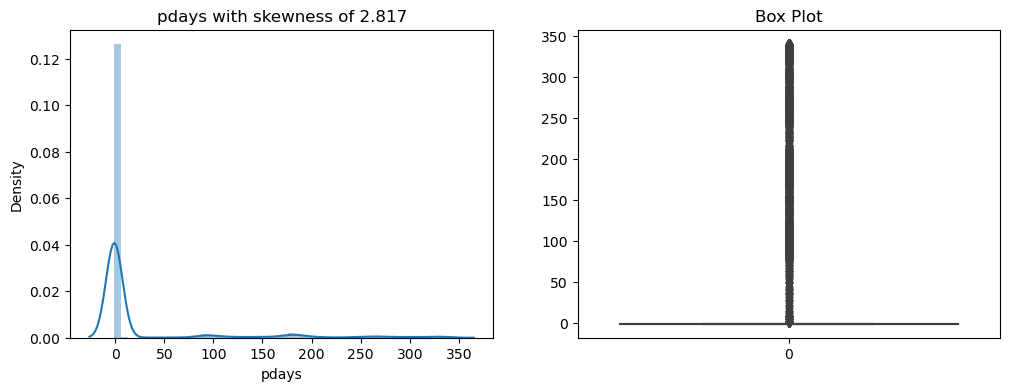

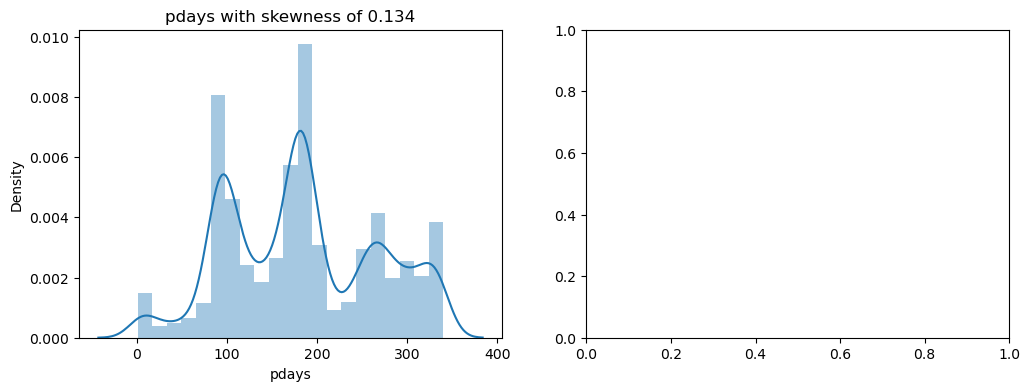

In [32]:
showPlots(df,'pdays')
showPlots(df.loc[df.pdays != -1],'pdays')

As we can see from the above graph, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: pdays_missing, pmonths_less_4, pmonths_bet_4_8, and pmonths_greater_8.

In [ ]:
#Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pmonths_less_4'] = 0
df['pmonths_bet_4_8'] = 0
df['pmonths_greater_8'] = 0

df['pdays_missing'][df.pdays == -1] = 1
df['pmonths'] = round(df.pdays/30)

df['pmonths_less_4'][(df['pmonths'] > 0) & (df['pmonths'] <= 4)] = 1
df['pmonths_greater_8'][(df['pmonths'] > 8)] = 1
df['pmonths_bet_4_8'][(df['pmonths'] > 4) & (df['pmonths'] <= 8)]= 1

df.drop('pdays', axis=1, inplace=True);
df.drop('pmonths', axis=1, inplace=True)

df.head(10)

#### Target Column Distribution

In [ ]:
df.hist(column='Target', figsize=(8, 3))

##### Observation
1. Target is a Boolean variable.
2. Around 11% customer has subcribed a term deposit.

### Multivariate Analysis

1. Categorical Variable vs Target Variable

In [ ]:
def BarPlotWrtTarget (col):
    plt.figure(figsize=(7,3))
    ct = pd.crosstab(df[col], df.Target)
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8, 3))

In [ ]:
# Job Variable
BarPlotWrtTarget('job')

##### Observation: Students & Retired customers have a higher probability of subcribing a term deposit.

In [ ]:
# Marital Variable
BarPlotWrtTarget('marital')

##### Observation : Marital doesn't have any impact on Target

In [ ]:
# Education Variable
BarPlotWrtTarget('education')

##### Observation : education doesn't have any impact on Target

In [ ]:
# Month Variable
BarPlotWrtTarget('month')

##### Observation : Month mar, sep, oct & dec has higher chances of subcription

In [ ]:
# poutcome Variable
BarPlotWrtTarget('poutcome')

##### Observation : Successful outcome of the previous campaign has an impact on Target variable

2. Boolean Independent Variable vs Target Variable

In [ ]:
# Default
BarPlotWrtTarget('default')

##### Observation : default column does not seem to affect the Target Variable.

In [ ]:
# Housing
BarPlotWrtTarget('housing')

##### Observation : Customers not having housing loan are more likely to opt for term deposits

In [ ]:
# Loan
BarPlotWrtTarget('loan')

##### Observation : Customer not having personal loan are more likely to opt for term deposits

3. Numerical Independent Variable vs Target Variable

In [ ]:
#Age
sns.distplot(df[df.Target == 0]['age'], color = 'r')
sns.distplot(df[df.Target == 1]['age'], color = 'g')

##### Observation: Age does not affect the chances of opting for term deposits

In [ ]:
#Balance
sns.distplot(df[df.Target == 0]['balance'], color = 'r')
sns.distplot(df[df.Target == 1]['balance'], color = 'g')

##### Observation: Customer avg annual balance does not majorly affect the chances of opting for term deposits

#### Handling Month Column
We will be updated the month name with the corresponding number i.e. Jan=1, Feb=2 and so on. There are primarily 2 reasons
1. The month column has an order in itself i.e. 1 to 12. Just by looking at the number we will be able to easily understand which month we are referring to in the data.
2. Applying One Hot Encoding to month column will result in 11 extra columns which will impact the computing time of various model. 

In [ ]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                 (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

#### One Hot Encoding for Categorical variables

In [ ]:
df_with_dummies=pd.get_dummies(df)

In [ ]:
df_with_dummies.columns

Drop one of the dummy variables as for $n$ categories we only need $n$-1 dummy variables.

In [ ]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

features_dropped = ['pmonths_less_4','job_unknown','education_unknown','contact_unknown']
df = dropfeature(df_with_dummies, features_dropped)

In [ ]:
# Drop columns not required
df.drop('duration', axis=1, inplace=True)

#### Correlation Comparison

In [ ]:
corr = df.corr()
# Highlighting only highly correlated features
corr = corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)]
# select only the lower triangle of the correlation matrix
lower_triangle = np.tril(corr) 
# to mask the upper triangle in the following heatmap
mask = lower_triangle == 0  

plt.figure(figsize = (25,20))
sns.set(font_scale=1.1)
# Setting it to white so that we do not see the grid lines
sns.set_style(style = 'dark')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, mask = mask, linecolor='white', vmax=.8, fmt='.2f', linewidths=0.01, square=True)

#Logic to manage the known issue with Matplotlib version 3.1.11 w.r.t. Heat Map
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
sns.set(font_scale=1)

#### Observation
1. The Heat Map shows that the Target Variable has correlation with housing, pdays_missing, previous, contact_cellular, month_mar, month_sep, month_oct, poutcome_nonexistant and poutcome_success. We expect to see these independent variables as significant while building the models.